## Importing Libraries

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from wordcloud import WordCloud, STOPWORDS
import re

sns.set(style="whitegrid")


## Loading File

In [ ]:
df = pd.read_csv("Dataset/games_cleaned.csv")

## Checking Dataset

In [5]:
print(f"DataFrame shape: {df.shape}")
print(f"DataFrame columns: {df.columns.tolist()}")

DataFrame shape: (22105, 540)
DataFrame columns: ['Name', 'Peak CCU', 'Required age', 'Price', 'DLC count', 'About the game', 'Windows', 'Mac', 'Linux', 'Achievements', 'Recommendations', 'Average playtime two weeks', 'Median playtime forever', 'Developers', 'Publishers', 'Game Age (Days)', 'is_indie', 'Owner range', 'Total Reviews', 'Review Ratio', 'Num Languages', 'Is English Supported', 'Tags_Singleplayer', 'Tags_Adventure', 'Tags_Action', 'Tags_Casual', 'Tags_2D', 'Tags_Strategy', 'Tags_Simulation', 'Tags_RPG', 'Tags_Atmospheric', 'Tags_Story Rich', 'Tags_Multiplayer', 'Tags_Puzzle', 'Tags_3D', 'Tags_Fantasy', 'Tags_Exploration', 'Tags_Cute', 'Tags_First-Person', 'Tags_Early Access', 'Tags_Colorful', 'Tags_Pixel Graphics', 'Tags_Anime', 'Tags_Funny', 'Tags_Female Protagonist', 'Tags_Horror', 'Tags_Open World', 'Tags_Sci-fi', 'Tags_Great Soundtrack', 'Tags_Shooter', 'Tags_Co-op', 'Tags_Family Friendly', 'Tags_Relaxing', 'Tags_Arcade', 'Tags_Retro', 'Tags_Difficult', 'Tags_Action-Adv

## Variables

In [6]:
columns = df.columns.tolist()
print(columns)

['Name', 'Peak CCU', 'Required age', 'Price', 'DLC count', 'About the game', 'Windows', 'Mac', 'Linux', 'Achievements', 'Recommendations', 'Average playtime two weeks', 'Median playtime forever', 'Developers', 'Publishers', 'Game Age (Days)', 'is_indie', 'Owner range', 'Total Reviews', 'Review Ratio', 'Num Languages', 'Is English Supported', 'Tags_Singleplayer', 'Tags_Adventure', 'Tags_Action', 'Tags_Casual', 'Tags_2D', 'Tags_Strategy', 'Tags_Simulation', 'Tags_RPG', 'Tags_Atmospheric', 'Tags_Story Rich', 'Tags_Multiplayer', 'Tags_Puzzle', 'Tags_3D', 'Tags_Fantasy', 'Tags_Exploration', 'Tags_Cute', 'Tags_First-Person', 'Tags_Early Access', 'Tags_Colorful', 'Tags_Pixel Graphics', 'Tags_Anime', 'Tags_Funny', 'Tags_Female Protagonist', 'Tags_Horror', 'Tags_Open World', 'Tags_Sci-fi', 'Tags_Great Soundtrack', 'Tags_Shooter', 'Tags_Co-op', 'Tags_Family Friendly', 'Tags_Relaxing', 'Tags_Arcade', 'Tags_Retro', 'Tags_Difficult', 'Tags_Action-Adventure', 'Tags_Third Person', 'Tags_Sandbox', 'Ta

Our goal is to find predictors that best able to describe **Recommendations**, we'll be starting with numerical, to check the skewness of variables

### Numerical Predictors
We start but checking for the skewness of numerical variables

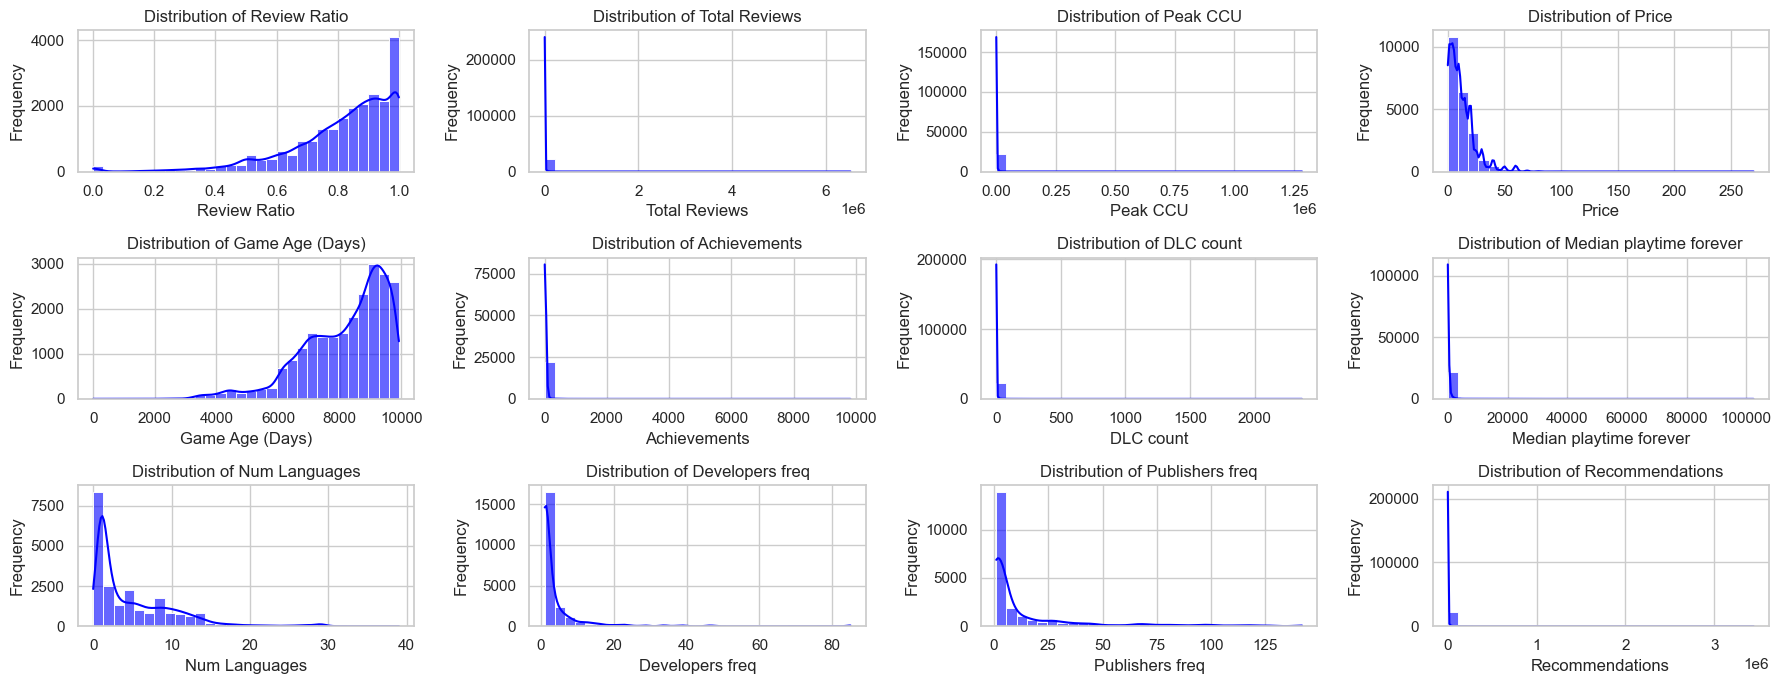


Summary Statistics for Numerical Predictors:


,Review Ratio,Total Reviews,Peak CCU,Price,Game Age (Days),Achievements,DLC count,Median playtime forever,Num Languages,Developers freq,Publishers freq,Recommendations
count,22105.000000,2.210500e+04,2.210500e+04,22105.000000,22105.000000,22105.000000,22105.000000,22105.000000,22105.000000,22105.000000,22105.000000,2.210500e+04
mean,0.817295,4.091226e+03,7.057119e+02,11.837520,8178.359014,30.921873,1.396109,259.348880,5.037458,4.063560,15.084053,2.698654e+03
std,0.172637,5.484831e+04,1.611792e+04,11.695174,1360.713819,182.473190,25.029620,1584.037717,5.287239,7.894377,27.464406,3.284402e+04
min,0.000000,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000e+00
25%,0.740000,2.600000e+01,1.000000e+00,3.990000,7302.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000e+00
50%,0.859635,1.680000e+02,4.000000e+00,9.990000,8527.000000,14.000000,0.000000,0.000000,3.000000,1.000000,2.000000,0.000000e+00
75%,0.944444,8.820000e+02,2.200000e+01,16.190000,9249.000000,33.000000,1.000000,212.000000,8.000000,4.000000,14.000000,5.490000e+02
max,1.000000,6.531097e+06,1.284268e+06,269.990000,9923.000000,9821.000000,2366.000000,102435.000000,39.000000,85.000000,142.000000,3.441592e+06


In [7]:
numerical_col = [
    'Review Ratio', 'Total Reviews', 'Peak CCU',
    'Price', 'Game Age (Days)',
    'Achievements', 'DLC count',
    'Median playtime forever',
    'Num Languages', 
    'Developers freq', 'Publishers freq', 'Recommendations'
    ]

plt.figure(figsize=(6 * 3, 2 * 3.5))

# Plotting histograms for log-transformed numerical predictors before and after log transformation
for i, col in enumerate(numerical_col):
    plt.subplot(3, 4, i + 1)
    sns.histplot(df[col], kde=True, bins=30, color='blue', alpha=0.6)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

print("\nSummary Statistics for Numerical Predictors:")
display(df[numerical_col].describe())

Overall, it can be seen that Total Reviews, Peak CCU, Price, Achievements, DLC count, Median Playtime forever, Num Languages, Developers_freq, Publishers_freq and Recommendations are all very heavily right skewed due to the very high number of low values in all of the datasets. 

To check if that is the case, we'll create new features has_X to seperate the 0s from the other values

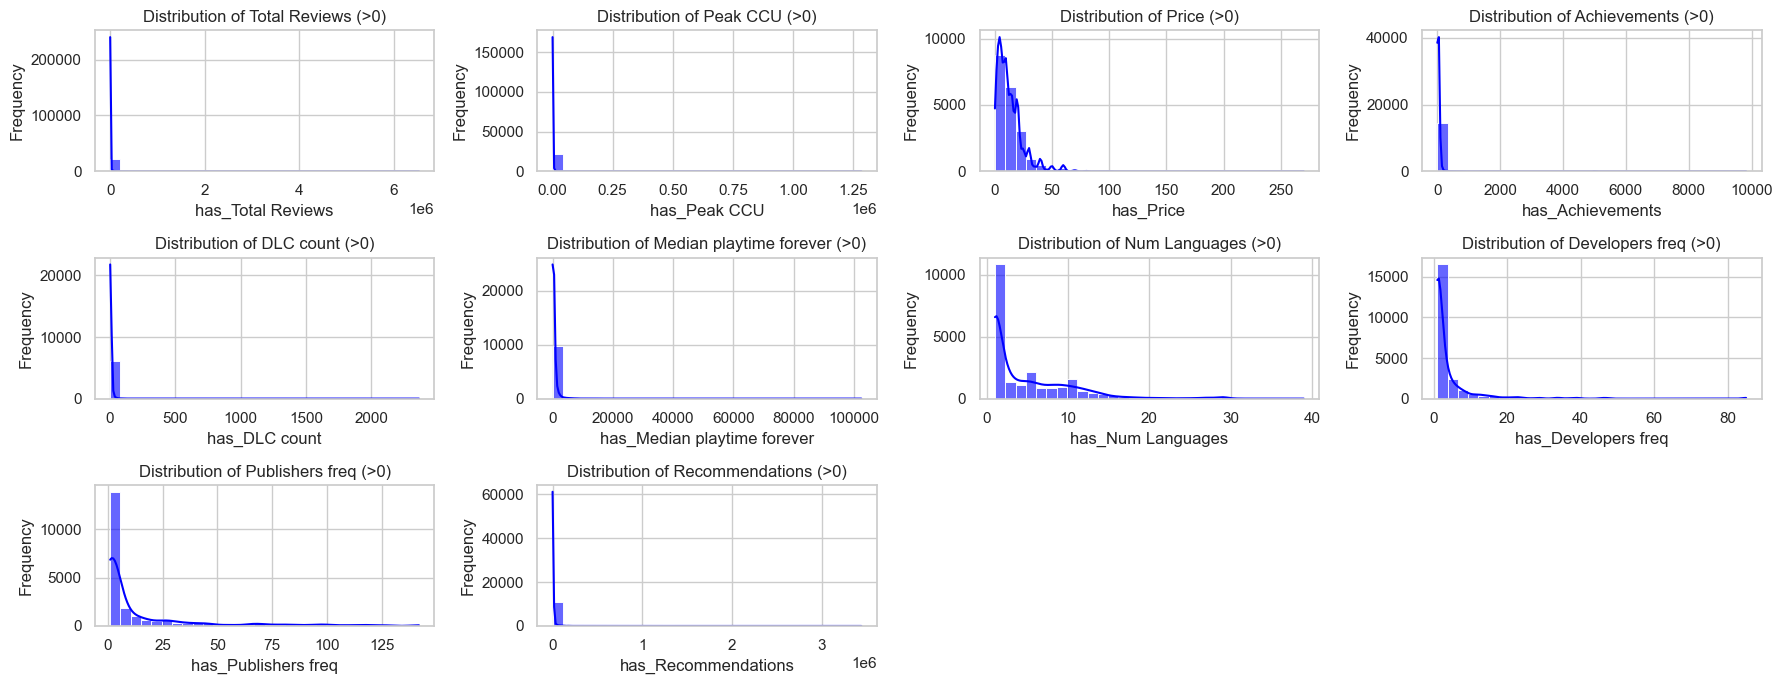

In [8]:
skewed_col = ['Total Reviews', 'Peak CCU', 'Price', 'Achievements', 'DLC count', 'Median playtime forever', 'Num Languages', 'Developers freq', 'Publishers freq', 'Recommendations']

# Add has_x for each skewed column
for col in skewed_col:
    df[f'has_{col}'] = df[col].apply(lambda x: 1 if x > 0 else 0)

plt.figure(figsize=(6 * 3, 2 * 3.5))

# Plot histogram for only columns that has x
for i, col in enumerate(skewed_col):
    plt.subplot(3, 4, i + 1)
    sns.histplot(df[col][df[f'has_{col}'] == 1], kde=True, bins=30, color='blue', alpha=0.6)
    plt.title(f'Distribution of {col} (>0)')
    plt.xlabel(f'has_{col}')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

As seen here, it still quite heavily right skewed.

To resolve this, we will be applying log1p (log(1 + x)) on these columns. Doing so will heavily compress the high ends and avoid errors with zero values.

However, 0 will be treated very differently from other small positive numbers, example (log(1+0)=0, but log(1+1=0.69). But is acceptable here since most our 0 are distinct states like no players, or no DLC.

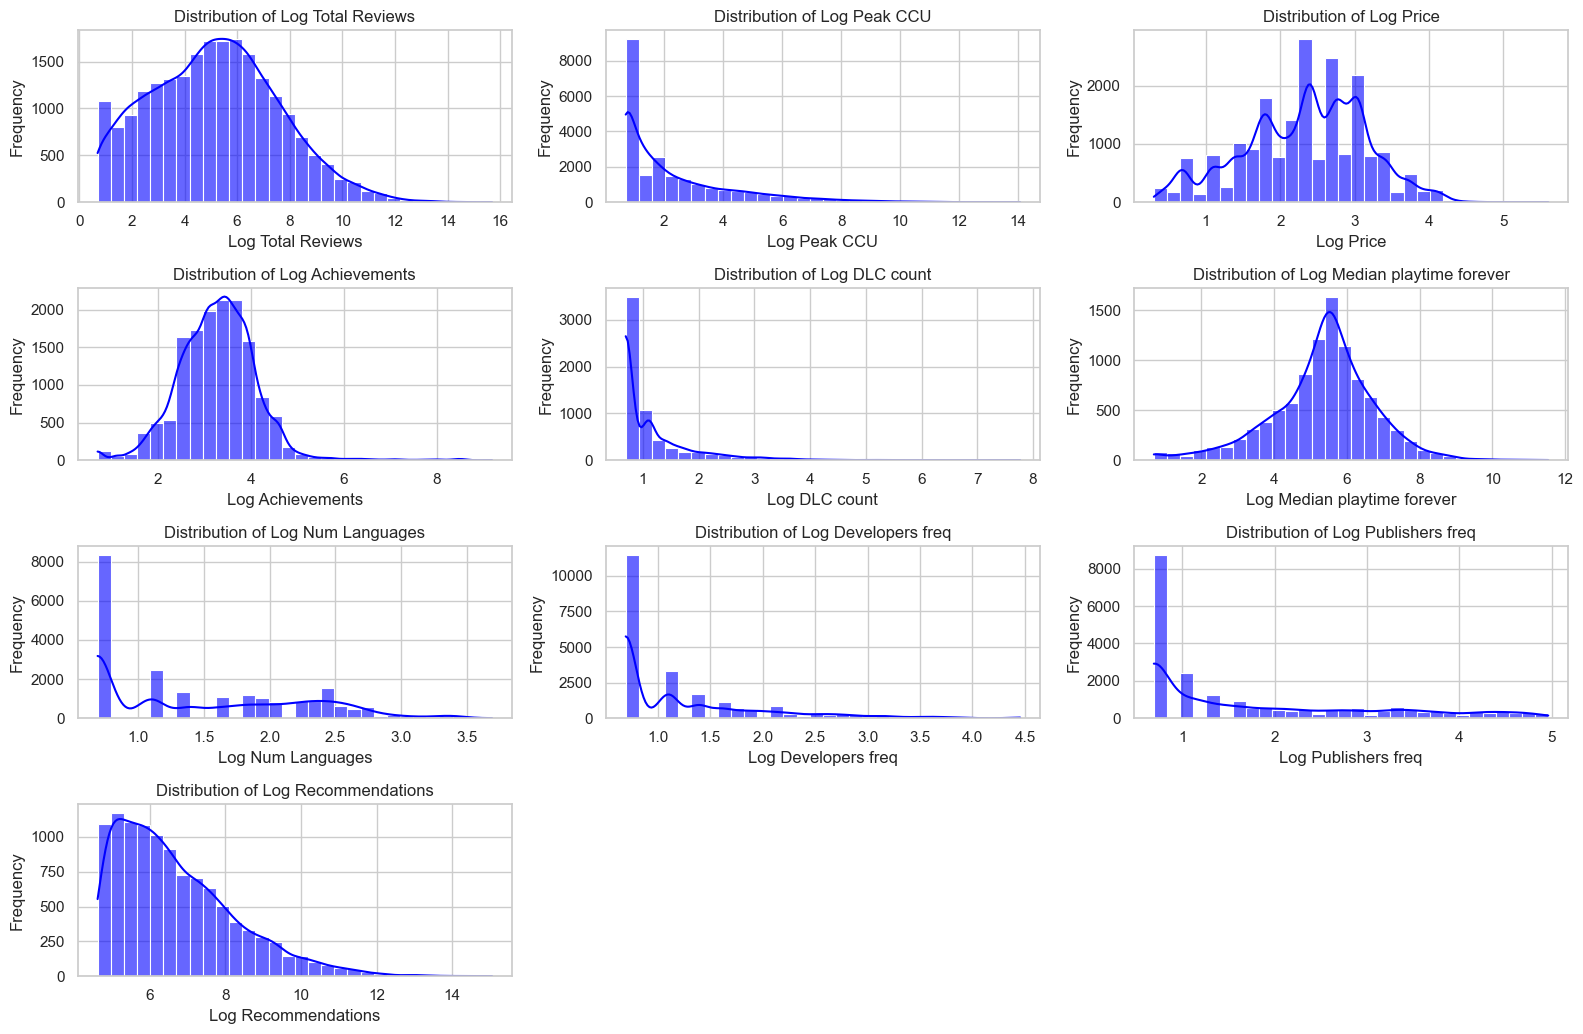

,Total Reviews,Peak CCU,Price,Achievements,DLC count,Median playtime forever,Num Languages,Developers freq,Publishers freq,Recommendations
count,2.210500e+04,2.210500e+04,22105.000000,22105.000000,22105.000000,22105.000000,22105.000000,22105.000000,22105.000000,2.210500e+04
mean,4.091226e+03,7.057119e+02,11.837520,30.921873,1.396109,259.348880,5.037458,4.063560,15.084053,2.698654e+03
std,5.484831e+04,1.611792e+04,11.695174,182.473190,25.029620,1584.037717,5.287239,7.894377,27.464406,3.284402e+04
min,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000e+00
25%,2.600000e+01,1.000000e+00,3.990000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000e+00
50%,1.680000e+02,4.000000e+00,9.990000,14.000000,0.000000,0.000000,3.000000,1.000000,2.000000,0.000000e+00
75%,8.820000e+02,2.200000e+01,16.190000,33.000000,1.000000,212.000000,8.000000,4.000000,14.000000,5.490000e+02
max,6.531097e+06,1.284268e+06,269.990000,9821.000000,2366.000000,102435.000000,39.000000,85.000000,142.000000,3.441592e+06


In [9]:
for col in skewed_col:
    df[f'Log {col}'] = np.log1p(df[col]) 

plt.figure(figsize=(4 * 4, 3 * 3.5))

for i, col in enumerate(skewed_col):
    plt.subplot(4, 3, i + 1)
    sns.histplot(df[f"Log {col}"][df[f'has_{col}'] == 1], kde=True, bins=30, color='blue', alpha=0.6)
    plt.title(f'Distribution of Log {col}')
    plt.xlabel(f'Log {col}')
    plt.ylabel('Frequency')
plt.tight_layout()

plt.show()
display(df[skewed_col].describe())

The skewness has improved slightly, although still slightly skills and imbalanced for some, next, we'll be plotting a correlation matrix among the predictors, to see which is best suitable for predicting **Recommendations**

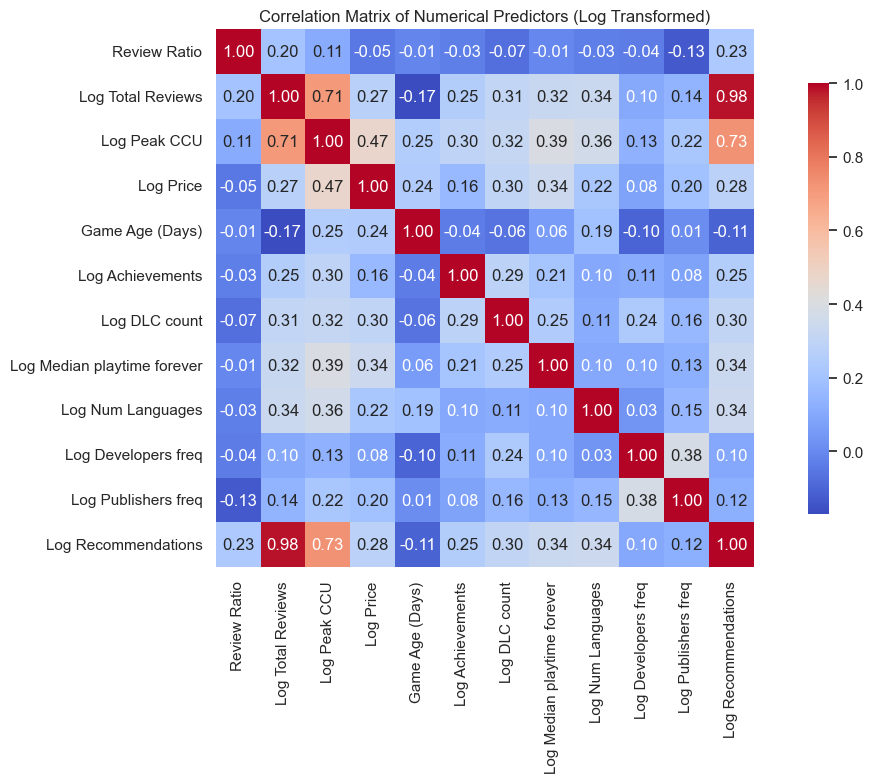

,Review Ratio,Log Total Reviews,Log Peak CCU,Log Price,Game Age (Days),Log Achievements,Log DLC count,Log Median playtime forever,Log Num Languages,Log Developers freq,Log Publishers freq,Log Recommendations
Review Ratio,1.000000,0.203457,0.109366,-0.048762,-0.009498,-0.029771,-0.073591,-0.008537,-0.029964,-0.039360,-0.130349,0.231703
Log Total Reviews,0.203457,1.000000,0.707803,0.271099,-0.168698,0.253570,0.308992,0.324558,0.335962,0.101580,0.137921,0.984320
Log Peak CCU,0.109366,0.707803,1.000000,0.472686,0.251193,0.295921,0.319430,0.393869,0.364955,0.131244,0.219599,0.729956
Log Price,-0.048762,0.271099,0.472686,1.000000,0.243926,0.160714,0.300923,0.341059,0.215668,0.077961,0.195947,0.280943
Game Age (Days),-0.009498,-0.168698,0.251193,0.243926,1.000000,-0.036673,-0.063655,0.055484,0.192039,-0.104280,0.010446,-0.108683
Log Achievements,-0.029771,0.253570,0.295921,0.160714,-0.036673,1.000000,0.287506,0.209354,0.098757,0.111013,0.078076,0.254534
Log DLC count,-0.073591,0.308992,0.319430,0.300923,-0.063655,0.287506,1.000000,0.245719,0.113189,0.237316,0.159652,0.301754
Log Median playtime forever,-0.008537,0.324558,0.393869,0.341059,0.055484,0.209354,0.245719,1.000000,0.100159,0.096721,0.127574,0.335157
Log Num Languages,-0.029964,0.335962,0.364955,0.215668,0.192039,0.098757,0.113189,0.100159,1.000000,0.032515,0.152690,0.339842
Log Developers freq,-0.039360,0.101580,0.131244,0.077961,-0.104280,0.111013,0.237316,0.096721,0.032515,1.000000,0.380572,0.100554


In [10]:
new_numical_col = []
# create a new df where only all has_x columns are 1

# Creating a new df where only have rows that has all the values > 0, this is to ensure the correlation matrix not heavily affected by the 0 values
new_df = df.copy()
for col in numerical_col:
    if col in skewed_col:
        new_df = new_df[new_df[f'has_{col}'] == 1]
        new_numical_col.append(f'Log {col}')
    else:
        new_numical_col.append(col)

# Calculating the correlation matrix of numerical predictors after log transformation
cor_matr = new_df[new_numical_col].corr()

# Plotting the correlation matrix of numerical predictors after log transformation
plt.figure(figsize=(12, 8))
sns.heatmap(cor_matr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numerical Predictors (Log Transformed)')
plt.tight_layout()
plt.show()

display(cor_matr)

What we can find here is that there is actually not a lot of strong variables that can describe Recommendations. 

The 2 strongest variables are Log Total Reviews at 0.98 and Peak CCU at 0.73. Total Reviews is not suitable to be used here since whether a game is recommended is just dependent on total number reviews and values are roughly the same.

Peak CCU is useful however, as it suggests games that has high number of concurrent users at one point, showing it's popularity, is more likely to recommend the games.

Therefore, the only useful numerical predictor we can utilize for providing **recommendations** here is **Peak CCU**.

### Categorical Predictors
Moving on to categorical variables, we want to start by identifying patterns in the tags, genres and categories of games starting off with frequencies of indie and non-indie games and tags

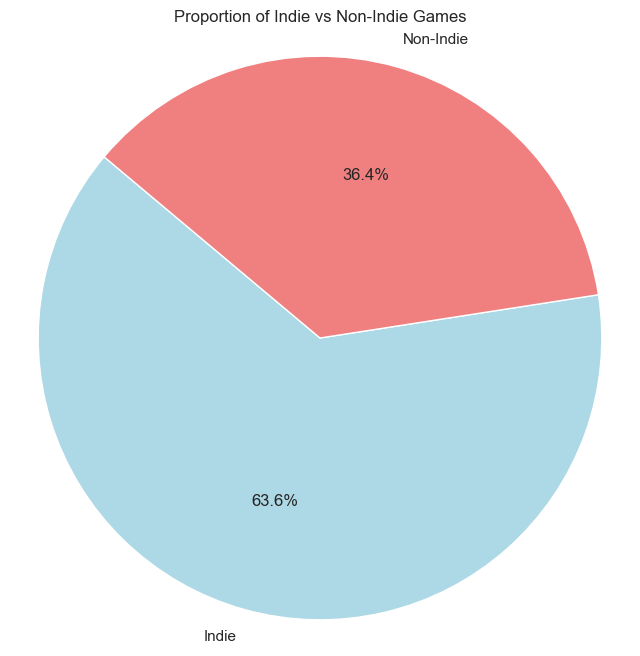

In [11]:
# pie chart of indie vs non-indie games
indie_count = df['is_indie'].value_counts()
indie_count.index = ['Indie', 'Non-Indie']
plt.figure(figsize=(8, 8))
plt.pie(indie_count, labels=indie_count.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'])
plt.title('Proportion of Indie vs Non-Indie Games')
plt.axis('equal') 
plt.show()

The graph actually shows that the majority games are indie games, meaning games developed by independent developers. Our recommendation model will have to take into account this information when recommending games.

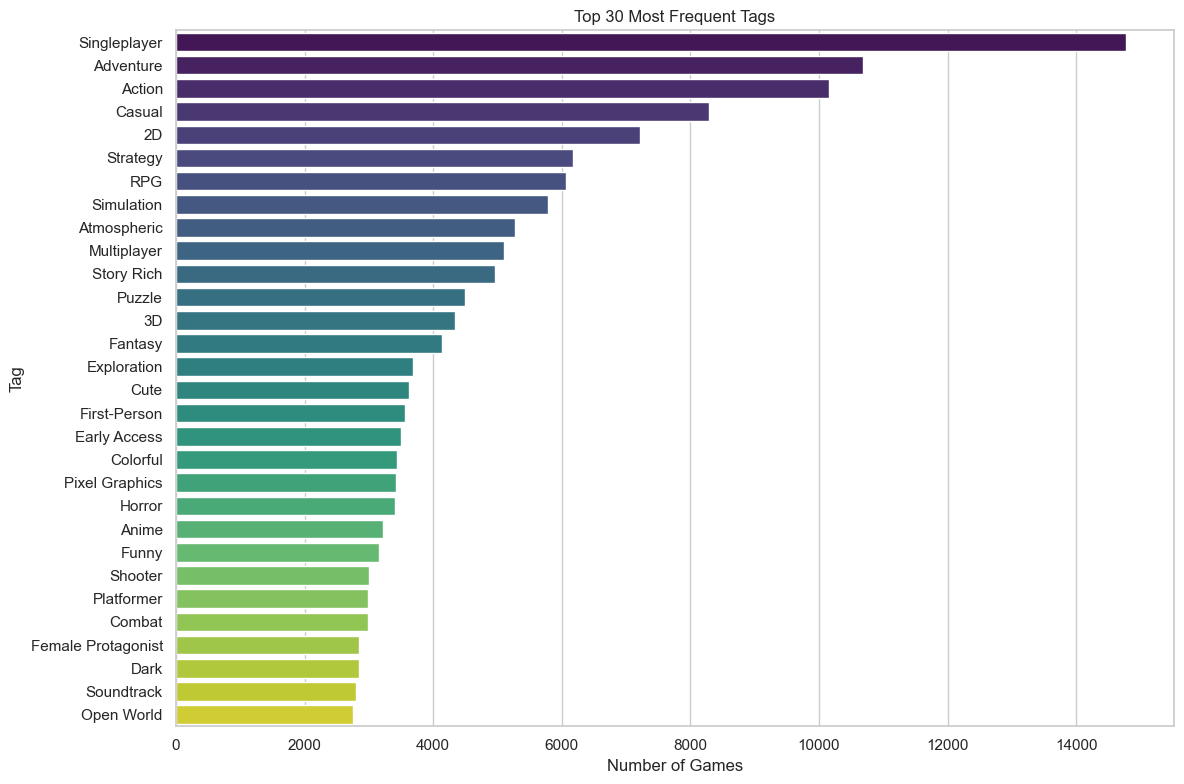

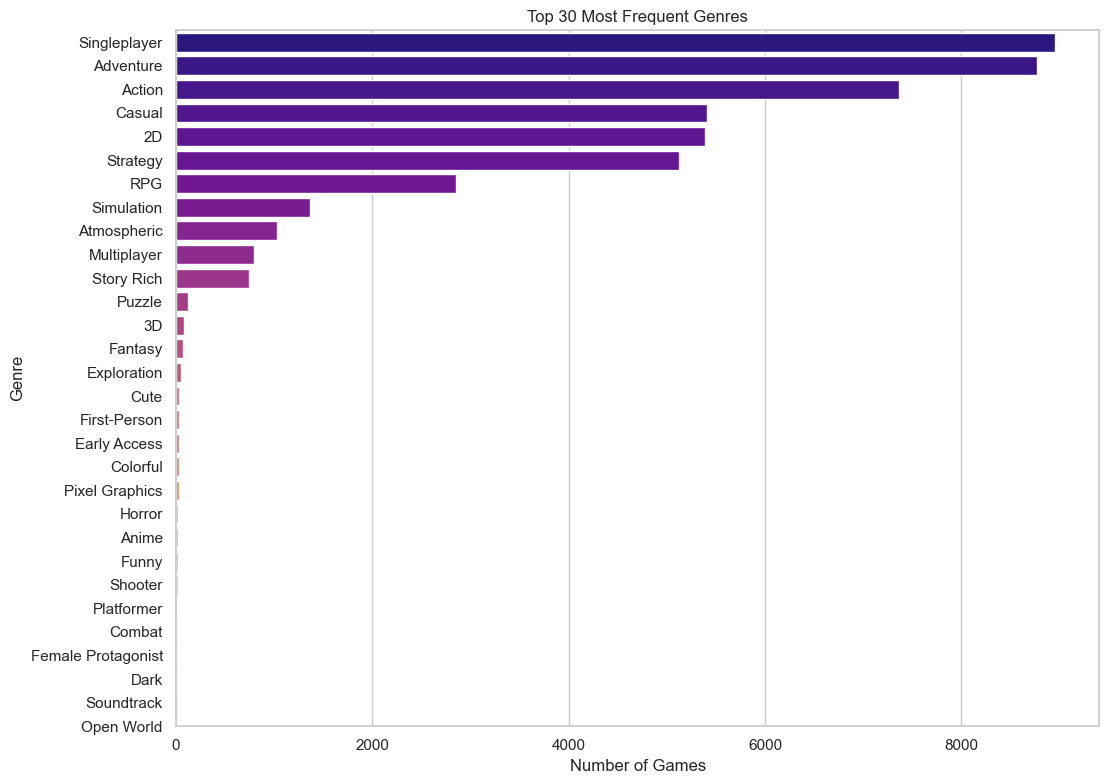

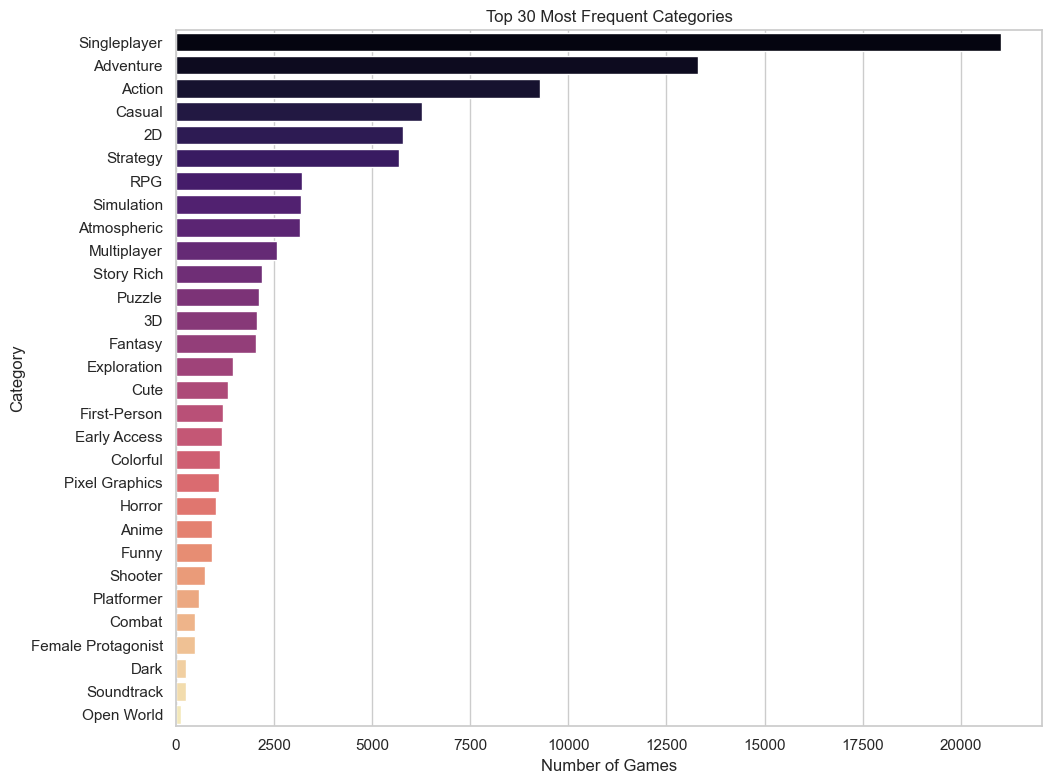


Top 5 Tags:


Tags_Singleplayer    14783
Tags_Adventure       10685
Tags_Action          10155
Tags_Casual           8288
Tags_2D               7211
dtype: int64


Top 5 Genres:


Genres_Adventure     8957
Genres_Action        8771
Genres_Casual        7360
Genres_Strategy      5411
Genres_Simulation    5388
dtype: int64


Top 5 Categories:


Categories_Single-player              21027
Categories_Steam Achievements         13307
Categories_Steam Cloud                 9267
Categories_Full controller support     6272
Categories_Multi-player                5792
dtype: int64

In [12]:
tag_cols = [col for col in df.columns if col.startswith('Tags_')]
genre_cols = [col for col in df.columns if col.startswith('Genres_')]
category_cols = [col for col in df.columns if col.startswith('Categories_')]

# Get number of each tags, genres, and categories sorted by frequency
tag_freq = df[tag_cols].sum().sort_values(ascending=False)
genre_freq = df[genre_cols].sum().sort_values(ascending=False)
category_freq = df[category_cols].sum().sort_values(ascending=False)

N = 30 # Number of top tags, genres, and categories to display

plt.figure(figsize=(12, 8))
sns.barplot(y=tag_freq.index[:N], x=tag_freq.values[:N], palette='viridis', hue=tag_freq.index[:N])
plt.title(f'Top {N} Most Frequent Tags')
plt.xlabel('Number of Games')
plt.ylabel('Tag')
plt.yticks(ticks=range(N), labels=[tag.split('_')[1] for tag in tag_freq.index[:N]])
plt.tight_layout()
plt.legend([],[], frameon=False) # Turn off legends since labels shown in y axis
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(y=genre_freq.index[:N], x=genre_freq.values[:N], palette='plasma', hue=genre_freq.index[:N])
plt.title(f'Top {N} Most Frequent Genres')
plt.xlabel('Number of Games')
plt.ylabel('Genre')
plt.tight_layout()
plt.yticks(ticks=range(N), labels=[tag.split('_')[1] for tag in tag_freq.index[:N]])
plt.legend([],[], frameon=False)
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(y=category_freq.index[:N], x=category_freq.values[:N], palette='magma', hue=category_freq.index[:N])
plt.title(f'Top {N} Most Frequent Categories')
plt.xlabel('Number of Games')
plt.ylabel('Category')
plt.tight_layout()
plt.yticks(ticks=range(N), labels=[tag.split('_')[1] for tag in tag_freq.index[:N]])
plt.legend([],[], frameon=False)
plt.show()

print("\nTop 5 Tags:")
display(tag_freq.head())
print("\nTop 5 Genres:")
display(genre_freq.head())
print("\nTop 5 Categories:")
display(category_freq.head())




The plots show that 'Singleplayer', 'Adventure', 'Casual', and 'Action' are extremely common tags and genres, and 'Steam Achievements' and 'Steam Cloud' are very common categories. 

This indicates a large portion of the dataset consists of single-player indie games, often with casual or action elements. These common features means our recommendation models need to leverage the less common, more specific tags/genres/categories effectively to provide diverse and relevant suggestions.

Next, we want to find out more about the distributions of game languages in steam games

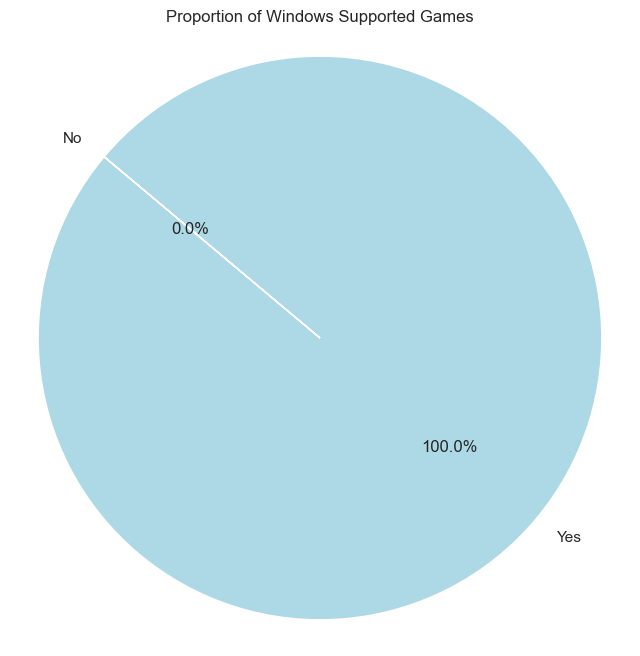

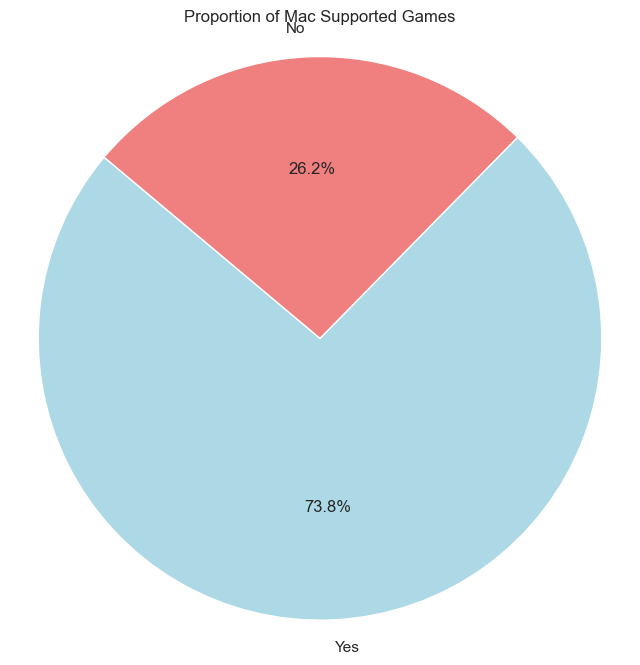

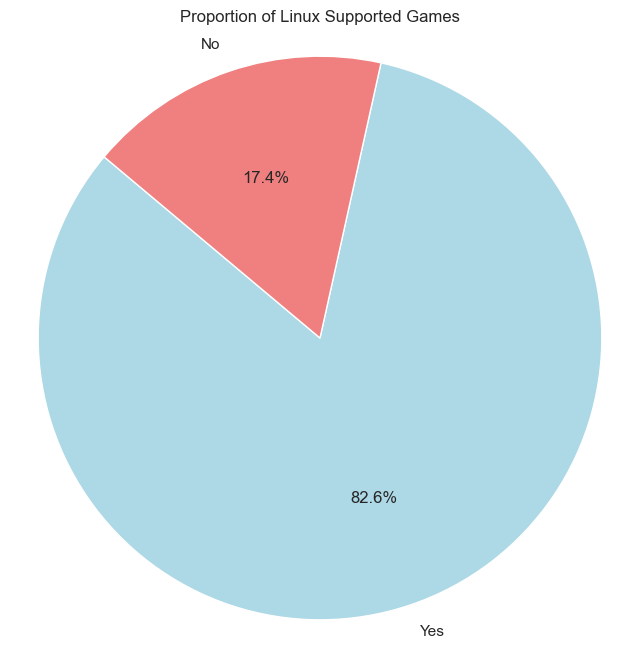

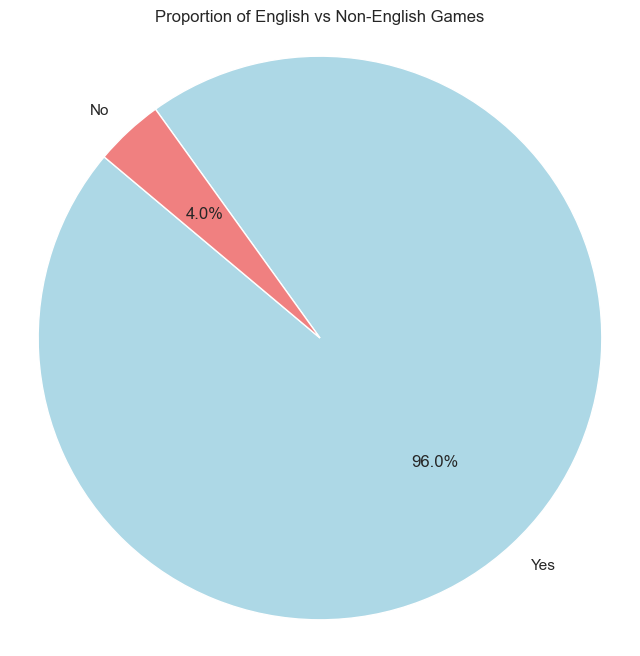

1    0.960326
0    0.039674
Name: Is English Supported, dtype: float64
1    0.99991
0    0.00009
Name: Windows, dtype: float64
0    0.737525
1    0.262475
Name: Mac, dtype: float64
0    0.826374
1    0.173626
Name: Linux, dtype: float64


In [44]:
# pie chart of indie vs non-indie games
cate = ['Windows', 'Mac', 'Linux']
for cat in cate:
    plt.figure(figsize=(8, 8))
    indie_count = df[cat].value_counts()
    indie_count.index = ['Yes', 'No']
    plt.pie(indie_count, labels=indie_count.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'])
    plt.title(f'Proportion of {cat} Supported Games')
    plt.axis('equal')
    plt.show()

indie_count = df['Is English Supported'].value_counts()
indie_count.index = ['Yes', 'No']
plt.figure(figsize=(8, 8))
plt.pie(indie_count, labels=indie_count.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'])
plt.title('Proportion of English vs Non-English Games')
plt.axis('equal') 
plt.show()

print(df['Is English Supported'].value_counts(normalize=True))
print(df['Windows'].value_counts(normalize=True))
print(df['Mac'].value_counts(normalize=True))
print(df['Linux'].value_counts(normalize=True))

As expected, a very high proportionp of the game supports english. Majority of games are in english, in fact, 99.99% of games support windows. Since the proportion is so one-sided, the recommendation model should not put high focus on the language or the platform.

Lastly, we want to check if the number of estimated owners affect the recommendations, meaning more owners = more recommendations to see if owner range is useful in our model.

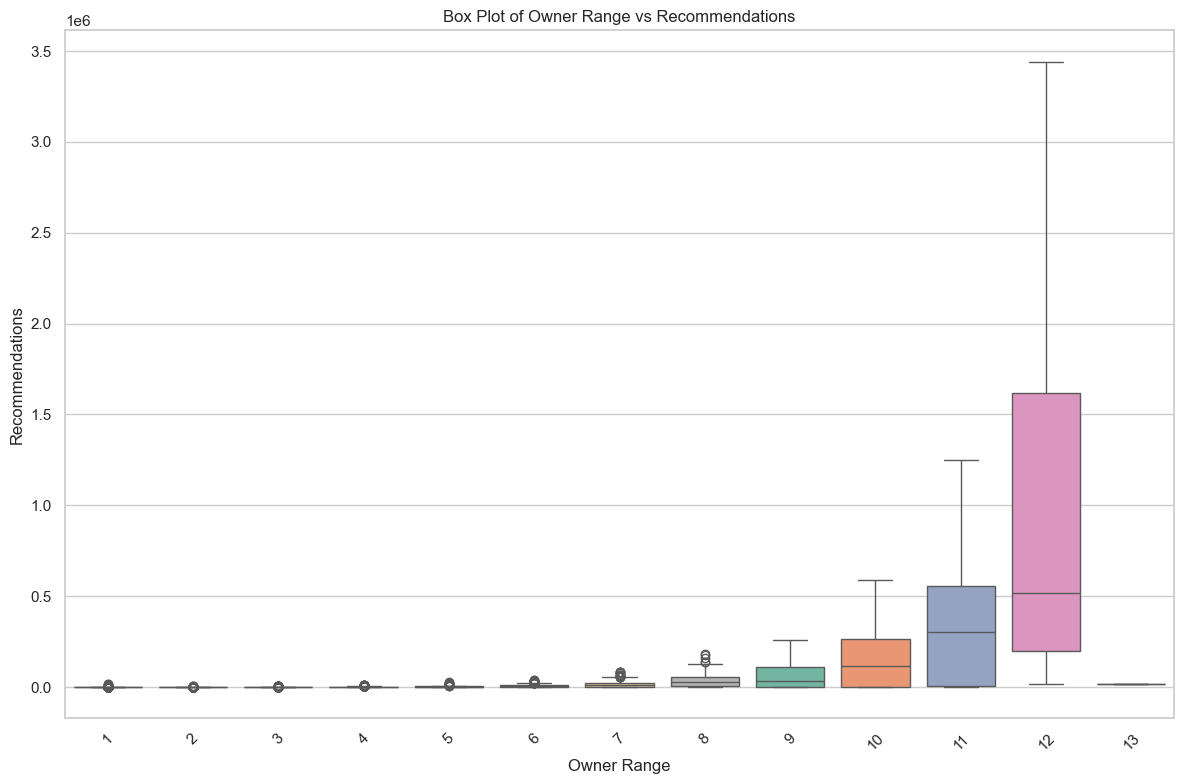

,count,mean,std,min,25%,50%,75%,max
Owner range,,,,,,,,
1,10825.0,5.944702e+01,3.374040e+02,0.0,0.00,0.0,0.00,18932.0
2,3297.0,2.832848e+02,3.668543e+02,0.0,0.00,191.0,420.00,7558.0
3,2359.0,6.050318e+02,6.877051e+02,0.0,102.50,394.0,890.50,5388.0
4,1947.0,1.141910e+03,1.324243e+03,0.0,202.00,736.0,1623.50,10098.0
5,1844.0,2.548860e+03,3.011090e+03,0.0,298.75,1715.5,3562.00,27540.0
6,855.0,6.331533e+03,6.623251e+03,0.0,836.00,4700.0,9421.50,38674.0
7,501.0,1.520914e+04,1.587545e+04,0.0,2264.00,10959.0,22704.00,84030.0
8,324.0,3.677998e+04,3.582214e+04,0.0,6826.00,28210.0,55958.50,181183.0
9,90.0,6.597726e+04,7.461084e+04,0.0,1857.50,35424.0,112969.50,259417.0


In [25]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Owner range', y='Recommendations', data=df, palette='Set2', hue='Owner range')
plt.title('Box Plot of Owner Range vs Recommendations')
plt.xlabel('Owner Range')
plt.ylabel('Recommendations')
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.show()

display(df.groupby('Owner range')['Recommendations'].describe())

Owner range represents the estimated number of owners for a game, the values are assigned as such

1->0-20000

2->20000-50000

3->50000-100000

4->100000-200000

5->200000-500000

6->500000-1000000

7->1000000-2000000

8->2000000-5000000

9->5000000-10000000

10->10000000-20000000

11->20000000-50000000

12->50000000-100000000

13->100000000-200000000

The graph is hard to visualize, so the summary statistics is provided to better show the values in the box plot, from the table, we can see there is good seperation between the owner ranges, where more people, on average, will recommend the game if more people play it. However, looking at the Inter-quartile range, there is significant overlap in some classes, making it unreliable for predicting the recommendations.

### Text Predictors
Finally, we will analysing description of the games, to see if there any patterns that could be useful for recommending games

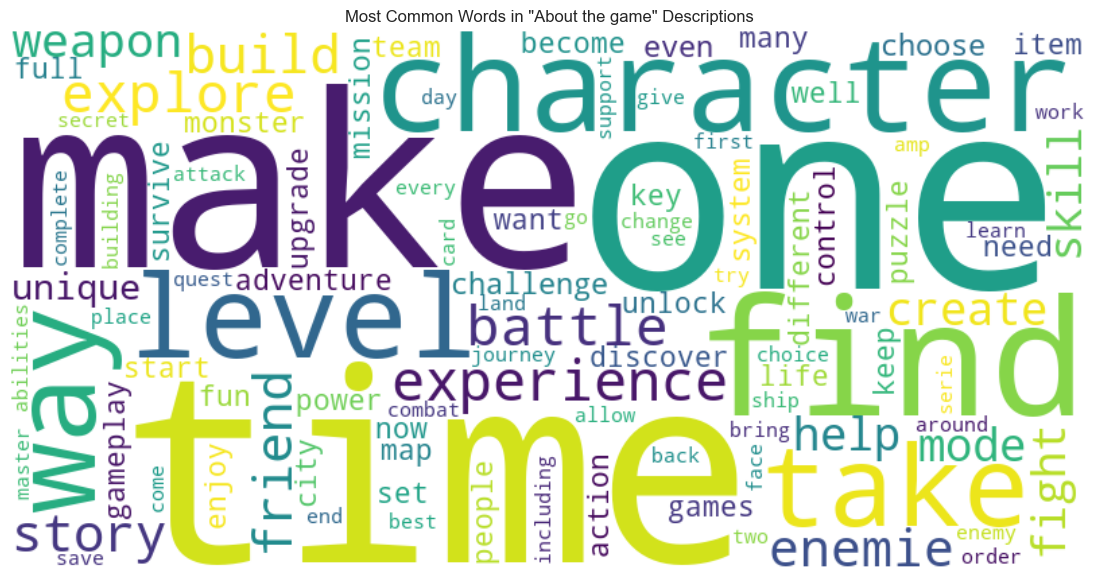

In [31]:
text_corpus = " ".join(str(review) for review in df['About the game'].fillna('')) # Concatenate all reviews into a single string

# Cleaning the text corpus
text_corpus = text_corpus.lower() # Convert to lowercase
text_corpus = re.sub(r'[^a-z0-9\s]', '', text_corpus) # Remove punctuation and special characters
text_corpus = re.sub(r'\s+', ' ', text_corpus).strip() # Remove extra spaces

custom_stopwords = set(STOPWORDS)
custom_stopwords.update(['game', 'player', 'players', 'feature', 'features', 'world', 'new', 'will', 'also', 'use', 'using', 'get', 'can', 'play']) # Removing common words from the word cloud

wordcloud = WordCloud(stopwords=custom_stopwords, background_color="white", max_words=100, width=800, height=400).generate(text_corpus)
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most Common Words in "About the game" Descriptions')
plt.show()

# Hellos

In [33]:
word_freq = pd.Series(text_corpus.split()).value_counts()
word_freq = word_freq[~word_freq.index.isin(custom_stopwords)]
print("\nTop 10 Most Common Words in 'About the game' Descriptions:")
display(word_freq.head(10))


Top 10 Most Common Words in 'About the game' Descriptions:


time          11988
different     11868
unique        11762
one           11108
experience    10132
story          9948
find           9390
make           9262
mode           8939
take           8830
dtype: int64

The words highlight different aspects and genres of the games.

Mode could point to different ways the game is played

time could refer to game length, real time or turn based aspects or similar mechanics

Different, unique, new could just be marketing terms for game mechanics

find, make, take describes actions players can make in the game

one could be describing the number of players in the game

In general, the presence of these words indicates that the game is rich with terms describing the game mechanics, game structure, key features, selling points and player experience which is useful for our content-based models (Cosine Similarity and KNN-A), and that TF-IDF should be able to effectively capture the similarities between games and described features.

### Cross-Feature Analysis
Now, we would like to explore relationships genres and key metadata like Peak CCU to help us understand if certain types of games inherently attract more players.

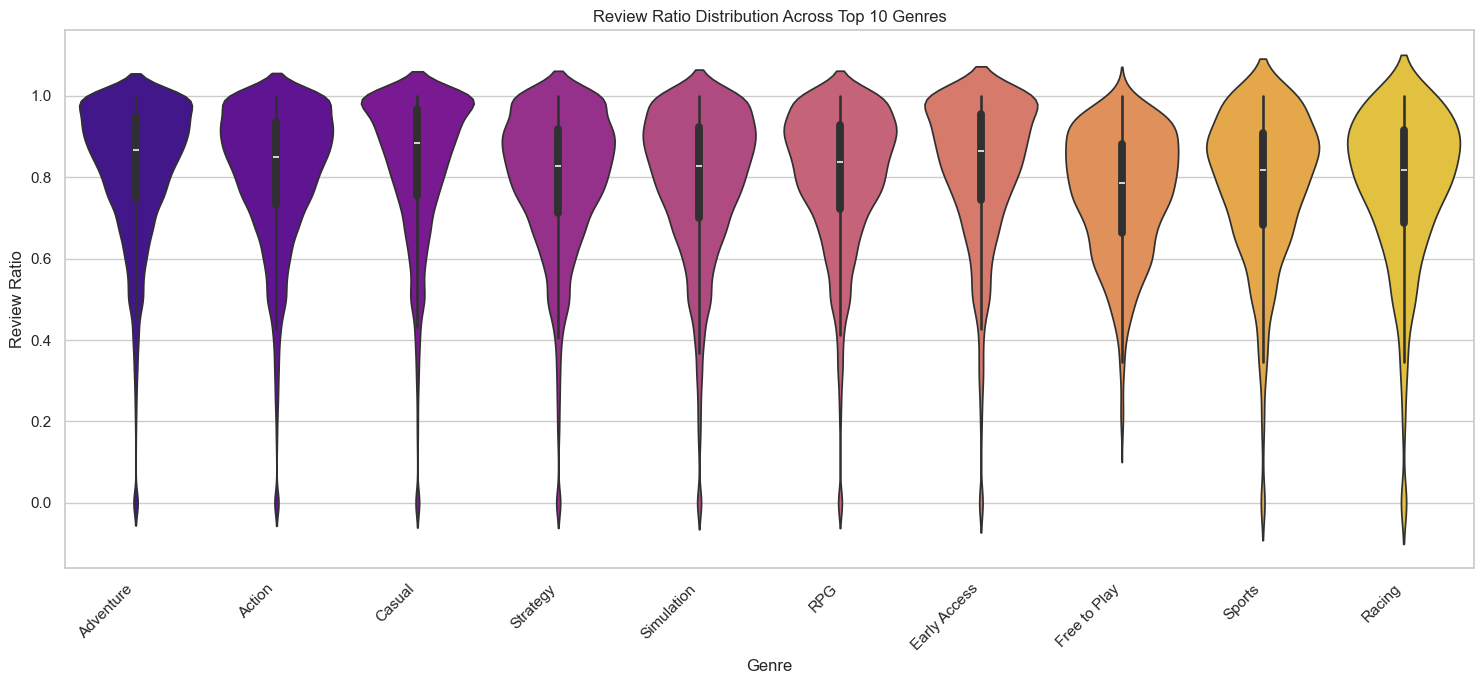

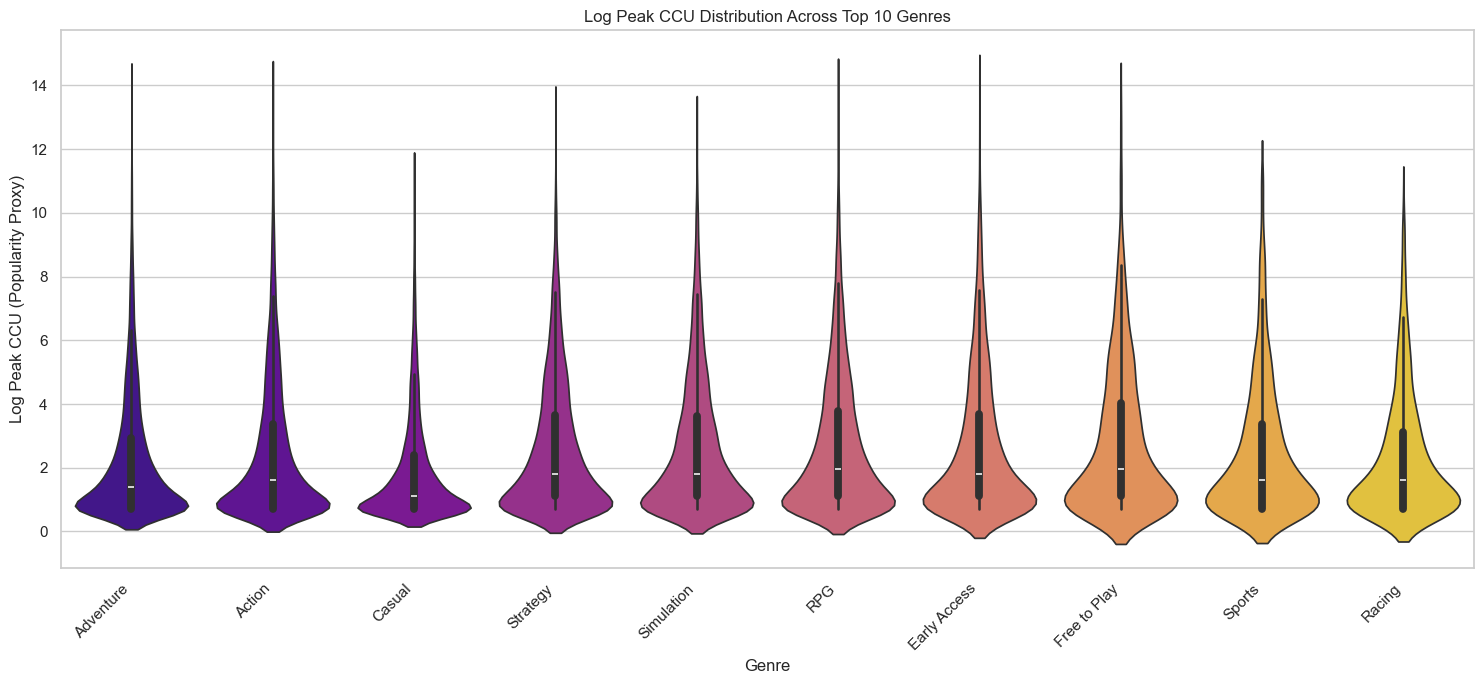

In [38]:
top_n_genres = genre_freq.head(10).index.tolist() # Get top 10 genres
df_top_genres = df[df[top_n_genres].any(axis=1)].copy() # Filter rows with at least one of the top genres

melted_df = pd.melt(df_top_genres,
                    id_vars=['Review Ratio', 'Log Peak CCU'], # Use the log-transformed Peak CCU
                    value_vars=top_n_genres,
                    var_name='Genre',
                    value_name='Is_Genre')

melted_df = melted_df[melted_df['Is_Genre'] == 1]
melted_df['Genre'] = melted_df['Genre'].str.replace('Genres_', '')
# Plot Review Ratio vs Top Genres
plt.figure(figsize=(15, 7))
sns.violinplot(x='Genre', y='Review Ratio', data=melted_df, palette='plasma', hue='Genre', legend=False)
plt.title('Review Ratio Distribution Across Top 10 Genres')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Review Ratio')
plt.xlabel('Genre')
plt.tight_layout()
plt.show()

# Plot Log Peak CCU vs Top Genres
plt.figure(figsize=(15, 7))
sns.violinplot(x='Genre', y='Log Peak CCU', data=melted_df, palette='plasma', hue='Genre', legend=False)
plt.title('Log Peak CCU Distribution Across Top 10 Genres')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Log Peak CCU (Popularity Proxy)')
plt.xlabel('Genre')
plt.tight_layout()
plt.show()

Unfortuantely both of these plots are not very informative. The violin plots show that the distributions of Review Ratio and Log Peak CCU are quite similar across the top 10 genres. This suggests that there is no significant difference in player reception or popularity based on genre classification.

Overall, it suggest within this data, the genre of a game is not a strong predictor of it's general popularity (Peak CCU) or overall player reception (Review Ratio), and that content features like genre and tags and metadata features like popularity and rating are not strongly correlated. 

It implies that content features (like genre/tags) and metadata features (like popularity/rating) might be more independent than initially assumed. They capture different aspects of a game.

In [ ]:
# Saving DF for ML to use
df.to_csv("Dataset/games_eda.csv", index=False)